In [244]:
import numpy as np 
import matplotlib.pyplot as plt 


from synthetic_signal import SignalGenerator


from methods import BasePersistentPattern
from plotting import plot_signal_pattern

In [245]:
N_SIGNALS = 5
SCENARIO = "variable_length_motif"

In [246]:
SCENARII = {
    "default" : dict(
        n_motifs = 5,
        motif_length=100,
        motif_amplitude=1,
        motif_fundamental =4,
        motif_type ='Sin',
        noise_amplitude=0.1,
        n_novelties=0,
        sparsity=3,
        sparsity_fluctuation = 0.2,
        walk_amplitude = 0.1,
        min_rep=5,
        max_rep=5
    ),
    "equal_length_motif" : dict(
        n_motifs = 3,
        motif_length=100,
        motif_amplitude=1,
        motif_fundamental =4,
        motif_type ='Sin',
        noise_amplitude=0.1,
        n_novelties=0,
        sparsity=3,
        sparsity_fluctuation = 0.2,
        min_rep=2,
        max_rep=10
    ),
    "variable_length_motif" : dict(
        n_motifs = 5,
        motif_length=(100,150),
        motif_amplitude=1,
        motif_fundamental =4,
        motif_type ='Sin',
        noise_amplitude=0.1,
        n_novelties=0,
        sparsity=3,
        sparsity_fluctuation = 0.2,
        walk_amplitude = 0.1,
        min_rep=2,
        max_rep=2,
    ),
}

In [247]:
#np.random.seed(0)
sg = SignalGenerator(**SCENARII[SCENARIO])
sg.generate()
sg.plot()

In [248]:
signal  = sg.signal_

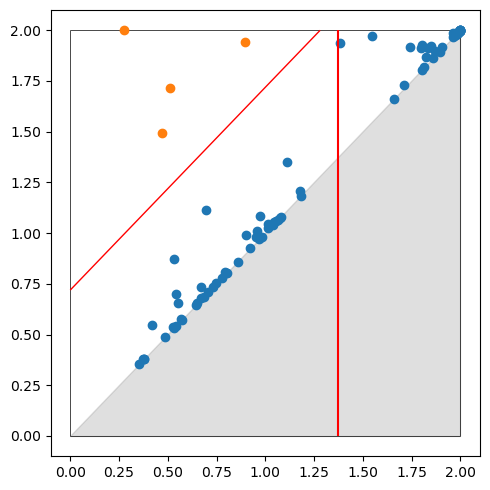

In [249]:
bpp = BasePersistentPattern(100,10,alpha=10,beta=0.,n_jobs=4)
bpp.fit(signal)
bpp.plot_persistence_diagram()

(<Figure size 2000x500 with 1 Axes>, <Axes: >)

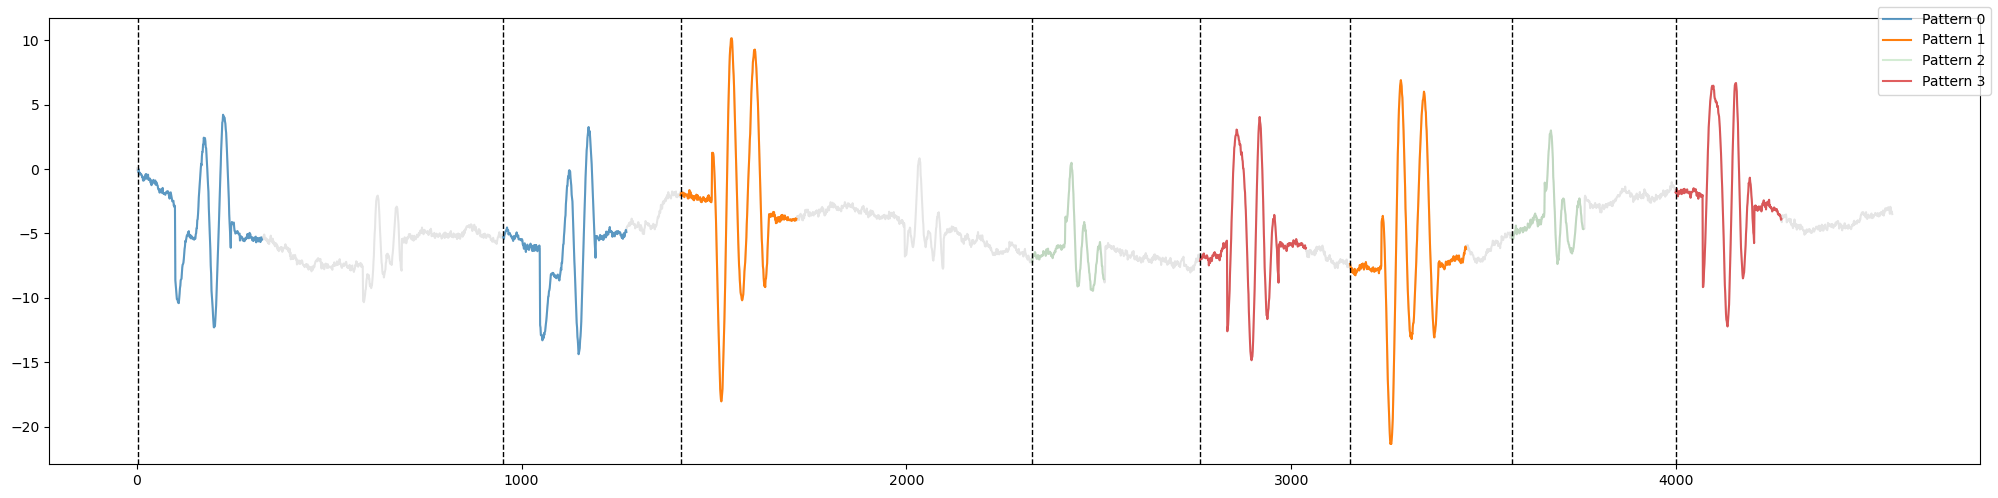

In [250]:
plot_signal_pattern(signal,*bpp.prediction_birth_list_)

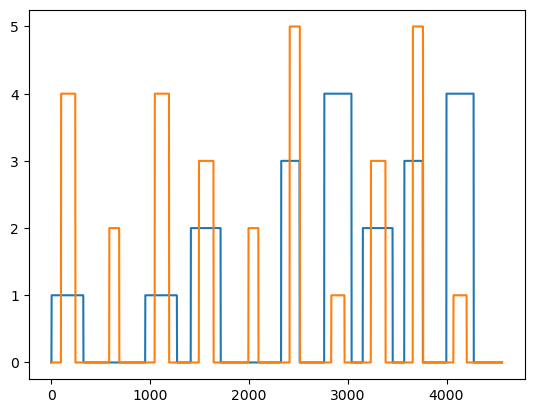

In [251]:
pred_mask = bpp.prediction_mask_
pred_mask *= np.arange(1,pred_mask.shape[0]+1).reshape(-1,1)
pred_mask = np.sum(pred_mask,axis=0)
plt.plot(pred_mask)

true_mask = sg.labels_
true_mask *= np.arange(1,true_mask.shape[0]+1).reshape(-1,1)
true_mask = np.sum(true_mask,axis=0)
plt.plot(true_mask)



In [252]:
from competitors import MatrixProfile

In [253]:
from sklearn.metrics import adjusted_mutual_info_score

In [254]:
adjusted_mutual_info_score(true_mask,pred_mask)

0.4557513954076921

In [255]:
sg.labels_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [256]:
mp = MatrixProfile(3,100,"NormalizedEuclidean")
mp.fit(signal)

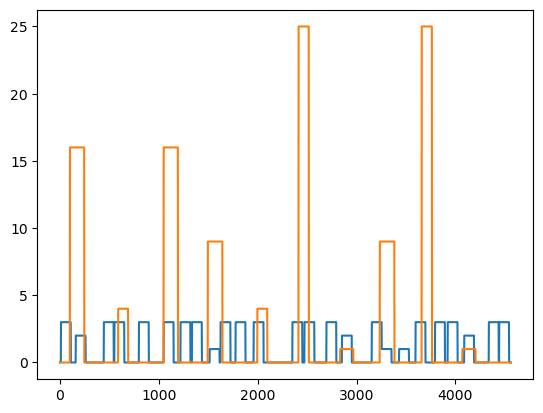

In [257]:
pred_mask = mp.prediction_mask_
pred_mask *= np.arange(1,pred_mask.shape[0]+1).reshape(-1,1)
pred_mask = np.sum(pred_mask,axis=0)
plt.plot(pred_mask)

true_mask = sg.labels_
true_mask *= np.arange(1,true_mask.shape[0]+1).reshape(-1,1)
true_mask = np.sum(true_mask,axis=0)
plt.plot(true_mask)

In [258]:
adjusted_mutual_info_score(true_mask,pred_mask)

0.24726052234688883